In [182]:
import numpy as np
import os
import geopandas as gpd
import matplotlib.pyplot as plt

In [183]:
PATH_TO_DICT = "../../output/"
PATH_TO_PLOT = "../../output/plots/"

In [184]:
# load all .npy files
files = {}
for file in os.listdir(PATH_TO_DICT):
    if file.endswith(".npy"):
        files[file] = np.load(PATH_TO_DICT + file, allow_pickle=True).item()

files.keys(), files['iou_result.npy'].keys()

(dict_keys(['iou_result.npy', 'linear_result.npy', 'product_result.npy']),
 dict_keys(['region_matrix_dict', 'region_array', 'dates', 'info_dict', 'region_influence_dict']))

In [185]:
# method to unpack a file
def unpack(file):
    return file['region_matrix_dict'], file['region_array'], file['dates'], file['info_dict'], file['region_influence_dict']


# unpack 'iou_result.npy'
region_matrix_dict, region_array, dates, info_dict, region_influence_dict = unpack(files['iou_result.npy'])

# rename the column 'region' to 'name' so that it can be merged with the world map new dataframe
region_influence_dict = region_influence_dict.rename(columns={'region': 'name'})

In [186]:
region_influence_dict

,name,influence
0,Australia,8.838307
1,Switzerland,8.722196
2,Belgium,8.710616
3,Ireland,8.597961
4,New Zealand,8.578888
5,Canada,8.534098
6,Costa Rica,8.159239
7,United Kingdom,8.087543
8,Portugal,7.999672
9,Czech Republic,7.787385


In [187]:
# Load the world map shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# print all of the countries in the world
# world['name'].values
# world.plot()
world.columns

C:\Users\excal\AppData\Local\Temp\ipykernel_40916\1370760659.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


Index(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry'], dtype='object')

In [188]:
# change region_influence_dict Singapore to Malaysia since geopandas does not have Singapore
# change region_influence_dict Czechia to Czech Republic, United States to United States of America and Hong Kong to China
region_influence_dict.loc[region_influence_dict['name'] == 'Singapore', 'name'] = 'Malaysia'
region_influence_dict.loc[region_influence_dict['name'] == 'Czech Republic', 'name'] = 'Czechia'
region_influence_dict.loc[region_influence_dict['name'] == 'United States', 'name'] = 'United States of America'
region_influence_dict.loc[region_influence_dict['name'] == 'Hong Kong', 'name'] = 'China'

# Merge the world map with the region_influence_dict but keep all of the countries in the world map and assign 0 to the countries that are not in region_influence_dict
world = world.merge(region_influence_dict, on='name', how='left')
world = world.fillna(0)

# check if all values of region_influence_dict are in world
for country in region_influence_dict['name']:
    if country not in world['name'].values:
        print(country)


# check rows, if there is any row with NaN values in the column 'influence' make it 0
world[world['influence'].isna()] = 0

In [189]:
print(world)

         pop_est      continent                      name iso_a3  gdp_md_est  \
0       889953.0        Oceania                      Fiji    FJI        5496   
1     58005463.0         Africa                  Tanzania    TZA       63177   
2       603253.0         Africa                 W. Sahara    ESH         907   
3     37589262.0  North America                    Canada    CAN     1736425   
4    328239523.0  North America  United States of America    USA    21433226   
..           ...            ...                       ...    ...         ...   
173    6944975.0         Europe                    Serbia    SRB       51475   
174     622137.0         Europe                Montenegro    MNE        5542   
175    1794248.0         Europe                    Kosovo    -99        7926   
176    1394973.0  North America       Trinidad and Tobago    TTO       24269   
177   11062113.0         Africa                  S. Sudan    SSD       11998   

                                       

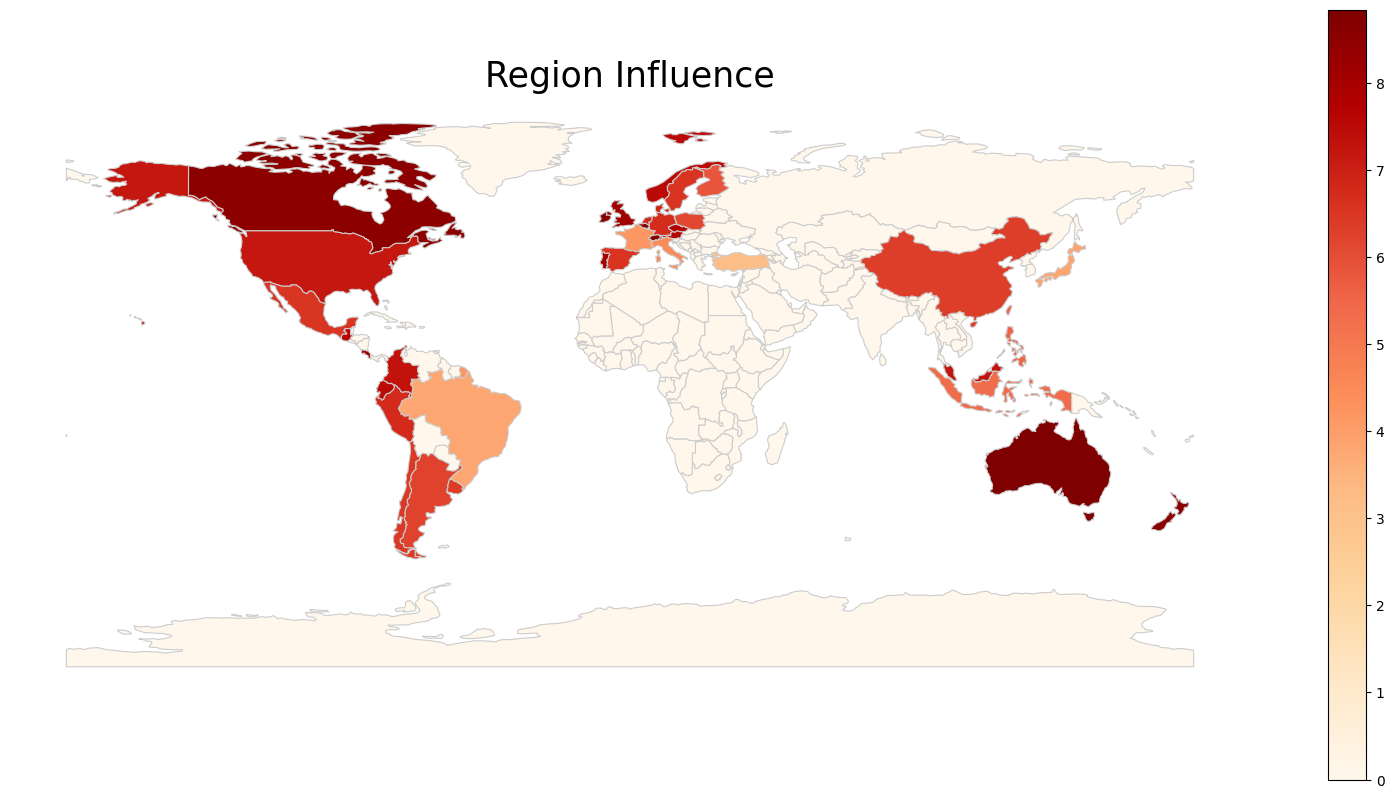

In [190]:
# method to plot the world map beautifully
def plot_world_map(world, column, title, save_name):
    fig, ax = plt.subplots(1, figsize=(20, 10))
    ax.axis('off')
    ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '3'})
    world.plot(column=column, cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    plt.savefig(PATH_TO_PLOT + save_name + '.png', dpi=300, bbox_inches='tight')
    plt.show()

# plot the world map with the column 'region_influence' as the color
plot_world_map(world, 'influence', 'Region Influence', 'region_influence')